# Extract Data from yfinance

In [51]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [52]:
df = yf.download('TSLA', 
                  start='2019-01-01', 
                  end='2024-4-29', 
                  progress=False)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-22,140.559998,144.440002,138.800003,142.050003,142.050003,107097600
2024-04-23,143.330002,147.259995,141.110001,144.679993,144.679993,124545100
2024-04-24,162.839996,167.970001,157.509995,162.130005,162.130005,181178000
2024-04-25,158.960007,170.880005,158.360001,170.179993,170.179993,126427500
2024-04-26,168.850006,172.119995,166.369995,168.289993,168.289993,109815700


In [53]:
df['Date'] = df.index  # Create a new column 'Date' with the index values
df.reset_index(drop=True, inplace=True) 

In [54]:
close_df = df[['Date', 'Close']]

In [55]:
close_df.head()

,Date,Close
0,2019-01-02,20.674667
1,2019-01-03,20.024000
2,2019-01-04,21.179333
3,2019-01-07,22.330667
4,2019-01-08,22.356667


# Create a Window Function 

In [56]:
def window(df, column_name, k):
    df_copy = df.copy()  
    for i in range(1, k + 1):
        new_column_name = f"{column_name}-{i}"
        df_copy[new_column_name] = df_copy[column_name].shift(i)
    # Swap column names
    column_names = list(df_copy.columns)
    return df_copy.iloc[:, ::-1].drop(range(k))

window_size = 60
close_df = window(close_df, 'Close', window_size)
#close_df = close_df.drop(columns = ['Date'])
close_df.tail(10)


,Close-60,Close-59,Close-58,Close-57,Close-56,Close-55,Close-54,Close-53,Close-52,Close-51,...,Close-8,Close-7,Close-6,Close-5,Close-4,Close-3,Close-2,Close-1,Close,Date
1329,211.880005,212.190002,208.800003,209.139999,207.830002,182.630005,183.250000,190.929993,191.589996,187.289993,...,168.380005,171.110001,164.899994,172.979996,176.880005,171.759995,174.600006,171.050003,161.479996,2024-04-15
1330,212.190002,208.800003,209.139999,207.830002,182.630005,183.250000,190.929993,191.589996,187.289993,188.860001,...,171.110001,164.899994,172.979996,176.880005,171.759995,174.600006,171.050003,161.479996,157.110001,2024-04-16
1331,208.800003,209.139999,207.830002,182.630005,183.250000,190.929993,191.589996,187.289993,188.860001,187.910004,...,164.899994,172.979996,176.880005,171.759995,174.600006,171.050003,161.479996,157.110001,155.449997,2024-04-17
1332,209.139999,207.830002,182.630005,183.250000,190.929993,191.589996,187.289993,188.860001,187.910004,181.059998,...,172.979996,176.880005,171.759995,174.600006,171.050003,161.479996,157.110001,155.449997,149.929993,2024-04-18
1333,207.830002,182.630005,183.250000,190.929993,191.589996,187.289993,188.860001,187.910004,181.059998,185.100006,...,176.880005,171.759995,174.600006,171.050003,161.479996,157.110001,155.449997,149.929993,147.050003,2024-04-19
1334,182.630005,183.250000,190.929993,191.589996,187.289993,188.860001,187.910004,181.059998,185.100006,187.580002,...,171.759995,174.600006,171.050003,161.479996,157.110001,155.449997,149.929993,147.050003,142.050003,2024-04-22
1335,183.250000,190.929993,191.589996,187.289993,188.860001,187.910004,181.059998,185.100006,187.580002,189.559998,...,174.600006,171.050003,161.479996,157.110001,155.449997,149.929993,147.050003,142.050003,144.679993,2024-04-23
1336,190.929993,191.589996,187.289993,188.860001,187.910004,181.059998,185.100006,187.580002,189.559998,193.570007,...,171.050003,161.479996,157.110001,155.449997,149.929993,147.050003,142.050003,144.679993,162.130005,2024-04-24
1337,191.589996,187.289993,188.860001,187.910004,181.059998,185.100006,187.580002,189.559998,193.570007,188.130005,...,161.479996,157.110001,155.449997,149.929993,147.050003,142.050003,144.679993,162.130005,170.179993,2024-04-25
1338,187.289993,188.860001,187.910004,181.059998,185.100006,187.580002,189.559998,193.570007,188.130005,184.020004,...,157.110001,155.449997,149.929993,147.050003,142.050003,144.679993,162.130005,170.179993,168.289993,2024-04-26


In [57]:
#close_df.set_index('Date', inplace=True)
close_df_copy = close_df.copy()
close_df_copy = close_df_copy.drop('Date', axis = 1)

In [58]:
X = close_df_copy.drop(columns = 'Close')
y = close_df_copy['Close'] 

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.to_numpy().reshape(-1, 1))

In [61]:
print(X.shape, y.shape)

(1279, 60) (1279,)


In [62]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

In [63]:
print(X_train.shape, X_test.shape)

(1023, 60) (256, 60)


In [64]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

def build_lstm():
    model = Sequential()
    model.add(InputLayer((window_size, 1)))
    model.add(LSTM(50, return_sequences=True))  
    model.add(Dropout(0.2)) 
    model.add(LSTM(50))  
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu')) 
    model.add(Dense(1, activation='linear'))  
    return model

#model.summary()

In [65]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_mape(actual, forecast):
    
    if len(actual) != len(forecast):
        raise ValueError("Length of actual and forecast lists must be the same")
    
    absolute_errors = [abs(actual[i] - forecast[i]) for i in range(len(actual))]
    percentage_errors = [absolute_errors[i] / actual[i] * 100 for i in range(len(actual))]
    mape = sum(percentage_errors) / len(actual)
    
    return mape

In [80]:
import optuna
def objective(trial):
    
    
    learning_rate = trial.suggest_float('learning_rate', 0.0098, 0.012)
    #batch_size = trial.suggest_categorical('batch_size', [16,32])
    
    print('Learning Rate', learning_rate)
    #print('batch_size', batch_size)
    
    model = build_lstm()
    
    checkpoint = ModelCheckpoint(f'tesla_model_lstm/model_tesla_window_60_{learning_rate}.h5', save_best_only=True)
    model.compile(loss='mean_squared_error',optimizer= Adam(learning_rate=learning_rate))
    model.fit(X_train, y_train, batch_size=32,epochs=400, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

    model_load = load_model(f'tesla_model_lstm/model_tesla_window_60_{learning_rate}.h5')
    
    test_predictions = model_load.predict(X_test).flatten()
    test_predictions = np.expand_dims(test_predictions, axis=1)
    test_predictions = scaler_y.inverse_transform(test_predictions)
    
    #test_y = np.expand_dims(y_test, axis=1)
    y_test1 = scaler_y.inverse_transform(y_test)
        
    y_TEST = y_test1
    y_PRED = test_predictions
        
    #mae = mean_absolute_error(y_TEST[-256:], y_PRED[-256:])
    #RMSE = rmse(y_TEST[-256:], y_PRED[-256:])
    MAPE = calculate_mape(y_TEST[-256:], y_PRED[-256:])
    #r2 = r2_score(y_TEST[-256:], y_PRED[-256:])
    
    return MAPE

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials = 20)

trial = study.best_trial
print(trial)

[I 2024-05-14 14:51:52,407] A new study created in memory with name: no-name-0f1a04ff-6d09-401c-87ef-7c14deb44635


Learning Rate 0.011357267776253337
Epoch 1/400
32/32 [==============================] - 4s 48ms/step - loss: 0.0203 - val_loss: 0.0012
Epoch 2/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 3/400
32/32 [==============================] - 1s 22ms/step - loss: 0.0023 - val_loss: 7.8452e-04
Epoch 4/400
32/32 [==============================] - 1s 22ms/step - loss: 0.0023 - val_loss: 7.0803e-04
Epoch 5/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 6/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0024 - val_loss: 7.1731e-04
Epoch 7/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 8/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0016 - val_loss: 7.5910e-04
Epoch 9/400
32/32 [==============================] - 1s 17ms/step - loss: 0.0016 - val_loss: 7.8541e-04
Epoch 10/400
32/32 [=========================

[I 2024-05-14 14:55:46,298] Trial 0 finished with value: 2.2999608761788877 and parameters: {'learning_rate': 0.011357267776253337}. Best is trial 0 with value: 2.2999608761788877.


Learning Rate 0.011236053425083391
Epoch 1/400
32/32 [==============================] - 4s 41ms/step - loss: 0.0256 - val_loss: 0.0017
Epoch 2/400
32/32 [==============================] - 1s 16ms/step - loss: 0.0040 - val_loss: 0.0019
Epoch 3/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 4/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0028 - val_loss: 8.2297e-04
Epoch 5/400
32/32 [==============================] - 1s 16ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 6/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0019 - val_loss: 9.9155e-04
Epoch 7/400
32/32 [==============================] - 0s 16ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 8/400
32/32 [==============================] - 1s 17ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 9/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0017 - val_loss: 7.1171e-04
Epoch 10/400
32/32 [==============================] -

[I 2024-05-14 14:59:38,370] Trial 1 finished with value: 2.271367845429687 and parameters: {'learning_rate': 0.011236053425083391}. Best is trial 1 with value: 2.271367845429687.


Learning Rate 0.011535323318762114
Epoch 1/400
32/32 [==============================] - 4s 42ms/step - loss: 0.0810 - val_loss: 0.0032
Epoch 2/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0048 - val_loss: 0.0015
Epoch 3/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0040 - val_loss: 0.0014
Epoch 4/400
32/32 [==============================] - 0s 15ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 5/400
32/32 [==============================] - 1s 17ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 6/400
32/32 [==============================] - 1s 16ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 7/400
32/32 [==============================] - 1s 16ms/step - loss: 0.0026 - val_loss: 0.0010
Epoch 8/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0022 - val_loss: 0.0032
Epoch 9/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0027 - val_loss: 9.5088e-04
Epoch 10/400
32/32 [==============================] - 1s 16ms

[I 2024-05-14 15:03:35,398] Trial 2 finished with value: 2.935595684953446 and parameters: {'learning_rate': 0.011535323318762114}. Best is trial 1 with value: 2.271367845429687.


Learning Rate 0.01074712940335762
Epoch 1/400
32/32 [==============================] - 4s 44ms/step - loss: 0.0846 - val_loss: 0.0037
Epoch 2/400
32/32 [==============================] - 1s 18ms/step - loss: 0.0049 - val_loss: 0.0018
Epoch 3/400
32/32 [==============================] - 1s 16ms/step - loss: 0.0045 - val_loss: 0.0023
Epoch 4/400
32/32 [==============================] - 1s 16ms/step - loss: 0.0037 - val_loss: 0.0024
Epoch 5/400
32/32 [==============================] - 1s 16ms/step - loss: 0.0032 - val_loss: 0.0010
Epoch 6/400
32/32 [==============================] - 1s 17ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 7/400
32/32 [==============================] - 0s 15ms/step - loss: 0.0031 - val_loss: 0.0010
Epoch 8/400
32/32 [==============================] - 1s 17ms/step - loss: 0.0023 - val_loss: 8.9122e-04
Epoch 9/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 10/400
32/32 [==============================] - 1s 21ms/

[I 2024-05-14 15:07:36,036] Trial 3 finished with value: 2.3032525542428846 and parameters: {'learning_rate': 0.01074712940335762}. Best is trial 1 with value: 2.271367845429687.


Learning Rate 0.01114587812511963
Epoch 1/400
32/32 [==============================] - 4s 41ms/step - loss: 0.0313 - val_loss: 0.0071
Epoch 2/400
32/32 [==============================] - 1s 22ms/step - loss: 0.0044 - val_loss: 0.0017
Epoch 3/400
32/32 [==============================] - 1s 18ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 4/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 5/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 6/400
32/32 [==============================] - 1s 16ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 7/400
32/32 [==============================] - 1s 18ms/step - loss: 0.0023 - val_loss: 7.8096e-04
Epoch 8/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0019 - val_loss: 7.3704e-04
Epoch 9/400
32/32 [==============================] - 1s 17ms/step - loss: 0.0019 - val_loss: 7.6304e-04
Epoch 10/400
32/32 [==============================] - 

[I 2024-05-14 15:11:33,442] Trial 4 finished with value: 2.3140800266387194 and parameters: {'learning_rate': 0.01114587812511963}. Best is trial 1 with value: 2.271367845429687.


Learning Rate 0.011955890688510233
Epoch 1/400
32/32 [==============================] - 4s 42ms/step - loss: 0.1105 - val_loss: 0.0097
Epoch 2/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0051 - val_loss: 0.0016
Epoch 3/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0033 - val_loss: 0.0012
Epoch 4/400
32/32 [==============================] - 1s 18ms/step - loss: 0.0034 - val_loss: 0.0012
Epoch 5/400
32/32 [==============================] - 1s 17ms/step - loss: 0.0030 - val_loss: 0.0016
Epoch 6/400
32/32 [==============================] - 1s 17ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 7/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0025 - val_loss: 9.1592e-04
Epoch 8/400
32/32 [==============================] - 1s 17ms/step - loss: 0.0026 - val_loss: 8.5180e-04
Epoch 9/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0020 - val_loss: 8.3731e-04
Epoch 10/400
32/32 [==============================] -

[I 2024-05-14 15:15:37,251] Trial 5 finished with value: 2.2823044946346727 and parameters: {'learning_rate': 0.011955890688510233}. Best is trial 1 with value: 2.271367845429687.


Learning Rate 0.010852144876593167
Epoch 1/400
32/32 [==============================] - 4s 45ms/step - loss: 0.0612 - val_loss: 0.0065
Epoch 2/400
32/32 [==============================] - 1s 22ms/step - loss: 0.0055 - val_loss: 0.0014
Epoch 3/400
32/32 [==============================] - 1s 23ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 4/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 5/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 6/400
32/32 [==============================] - 1s 23ms/step - loss: 0.0027 - val_loss: 0.0010
Epoch 7/400
32/32 [==============================] - 1s 24ms/step - loss: 0.0025 - val_loss: 8.7269e-04
Epoch 8/400
32/32 [==============================] - 1s 23ms/step - loss: 0.0022 - val_loss: 8.7936e-04
Epoch 9/400
32/32 [==============================] - 1s 22ms/step - loss: 0.0024 - val_loss: 0.0038
Epoch 10/400
32/32 [==============================] - 1s 

[I 2024-05-14 15:20:08,457] Trial 6 finished with value: 2.3417970267340076 and parameters: {'learning_rate': 0.010852144876593167}. Best is trial 1 with value: 2.271367845429687.


Learning Rate 0.010538621487674916
Epoch 1/400
32/32 [==============================] - 5s 46ms/step - loss: 0.0369 - val_loss: 0.0029
Epoch 2/400
32/32 [==============================] - 1s 22ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 3/400
32/32 [==============================] - 1s 22ms/step - loss: 0.0042 - val_loss: 0.0011
Epoch 4/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 5/400
32/32 [==============================] - 1s 22ms/step - loss: 0.0025 - val_loss: 8.8565e-04
Epoch 6/400
32/32 [==============================] - 1s 23ms/step - loss: 0.0022 - val_loss: 8.7644e-04
Epoch 7/400
32/32 [==============================] - 1s 22ms/step - loss: 0.0022 - val_loss: 7.8119e-04
Epoch 8/400
32/32 [==============================] - 1s 23ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 9/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 10/400
32/32 [==============================] -

[I 2024-05-14 15:24:35,124] Trial 7 finished with value: 2.335825532666714 and parameters: {'learning_rate': 0.010538621487674916}. Best is trial 1 with value: 2.271367845429687.


Learning Rate 0.011410821053408644
Epoch 1/400
32/32 [==============================] - 4s 43ms/step - loss: 0.0430 - val_loss: 0.0020
Epoch 2/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0037 - val_loss: 0.0016
Epoch 3/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0034 - val_loss: 0.0017
Epoch 4/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0030 - val_loss: 0.0018
Epoch 5/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0025 - val_loss: 0.0010
Epoch 6/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0018 - val_loss: 7.9243e-04
Epoch 7/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0021 - val_loss: 7.9141e-04
Epoch 8/400
32/32 [==============================] - 1s 18ms/step - loss: 0.0019 - val_loss: 9.4188e-04
Epoch 9/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0018 - val_loss: 7.2968e-04
Epoch 10/400
32/32 [=============================

[I 2024-05-14 15:29:00,694] Trial 8 finished with value: 2.2864681678727004 and parameters: {'learning_rate': 0.011410821053408644}. Best is trial 1 with value: 2.271367845429687.


Learning Rate 0.010151459824102952
Epoch 1/400
32/32 [==============================] - 4s 42ms/step - loss: 0.0259 - val_loss: 0.0027
Epoch 2/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0040 - val_loss: 0.0017
Epoch 3/400
32/32 [==============================] - 1s 22ms/step - loss: 0.0026 - val_loss: 8.1443e-04
Epoch 4/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 5/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0023 - val_loss: 8.3017e-04
Epoch 6/400
32/32 [==============================] - 1s 22ms/step - loss: 0.0019 - val_loss: 6.9574e-04
Epoch 7/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 8/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0021 - val_loss: 7.5622e-04
Epoch 9/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0022 - val_loss: 0.0041
Epoch 10/400
32/32 [=============================

[I 2024-05-14 15:33:12,876] Trial 9 finished with value: 2.2722344196142403 and parameters: {'learning_rate': 0.010151459824102952}. Best is trial 1 with value: 2.271367845429687.


Learning Rate 0.0098717960869911
Epoch 1/400
32/32 [==============================] - 4s 42ms/step - loss: 0.0589 - val_loss: 0.0042
Epoch 2/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0051 - val_loss: 0.0017
Epoch 3/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 4/400
32/32 [==============================] - 1s 18ms/step - loss: 0.0036 - val_loss: 0.0017
Epoch 5/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 6/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 7/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 8/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 9/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0021 - val_loss: 9.0945e-04
Epoch 10/400
32/32 [==============================] - 1s 17ms/s

[I 2024-05-14 15:37:23,902] Trial 10 finished with value: 2.364859399651484 and parameters: {'learning_rate': 0.0098717960869911}. Best is trial 1 with value: 2.271367845429687.


Learning Rate 0.010131432030114105
Epoch 1/400
32/32 [==============================] - 4s 48ms/step - loss: 0.0198 - val_loss: 0.0020
Epoch 2/400
32/32 [==============================] - 1s 22ms/step - loss: 0.0050 - val_loss: 0.0012
Epoch 3/400
32/32 [==============================] - 1s 23ms/step - loss: 0.0026 - val_loss: 9.5807e-04
Epoch 4/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0029 - val_loss: 7.7207e-04
Epoch 5/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0022 - val_loss: 7.8595e-04
Epoch 6/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 7/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 8/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 9/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0017 - val_loss: 9.5919e-04
Epoch 10/400
32/32 [=============================

[I 2024-05-14 15:41:41,035] Trial 11 finished with value: 2.3167789133028838 and parameters: {'learning_rate': 0.010131432030114105}. Best is trial 1 with value: 2.271367845429687.


Learning Rate 0.010297269497830795
Epoch 1/400
32/32 [==============================] - 4s 42ms/step - loss: 0.0516 - val_loss: 0.0032
Epoch 2/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0046 - val_loss: 0.0017
Epoch 3/400
32/32 [==============================] - 1s 16ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 4/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0038 - val_loss: 0.0013
Epoch 5/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0033 - val_loss: 0.0015
Epoch 6/400
32/32 [==============================] - 1s 23ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 7/400
32/32 [==============================] - 1s 23ms/step - loss: 0.0028 - val_loss: 9.8109e-04
Epoch 8/400
32/32 [==============================] - 1s 24ms/step - loss: 0.0022 - val_loss: 8.9261e-04
Epoch 9/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 10/400
32/32 [==============================] - 1s 

[I 2024-05-14 15:45:52,012] Trial 12 finished with value: 2.3202153535698398 and parameters: {'learning_rate': 0.010297269497830795}. Best is trial 1 with value: 2.271367845429687.


Learning Rate 0.011844854693761085
Epoch 1/400
32/32 [==============================] - 4s 42ms/step - loss: 0.0648 - val_loss: 0.0058
Epoch 2/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0064 - val_loss: 0.0013
Epoch 3/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0036 - val_loss: 0.0012
Epoch 4/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0034 - val_loss: 0.0015
Epoch 5/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0025 - val_loss: 9.3768e-04
Epoch 6/400
32/32 [==============================] - 1s 16ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 7/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0024 - val_loss: 9.0381e-04
Epoch 8/400
32/32 [==============================] - 1s 16ms/step - loss: 0.0028 - val_loss: 0.0011
Epoch 9/400
32/32 [==============================] - 0s 15ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 10/400
32/32 [==============================] - 1s 

[I 2024-05-14 15:49:56,855] Trial 13 finished with value: 2.2897707294470044 and parameters: {'learning_rate': 0.011844854693761085}. Best is trial 1 with value: 2.271367845429687.


Learning Rate 0.011046688703343178
Epoch 1/400
32/32 [==============================] - 4s 45ms/step - loss: 0.0231 - val_loss: 0.0016
Epoch 2/400
32/32 [==============================] - 1s 22ms/step - loss: 0.0031 - val_loss: 0.0011
Epoch 3/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 4/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 5/400
32/32 [==============================] - 1s 17ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 6/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0022 - val_loss: 7.2112e-04
Epoch 7/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0019 - val_loss: 7.0800e-04
Epoch 8/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 9/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 10/400
32/32 [==============================] - 1s 

[I 2024-05-14 15:54:10,501] Trial 14 finished with value: 2.281144893006619 and parameters: {'learning_rate': 0.011046688703343178}. Best is trial 1 with value: 2.271367845429687.


Learning Rate 0.010532915209709889
Epoch 1/400
32/32 [==============================] - 4s 45ms/step - loss: 0.0239 - val_loss: 0.0042
Epoch 2/400
32/32 [==============================] - 1s 22ms/step - loss: 0.0046 - val_loss: 0.0036
Epoch 3/400
32/32 [==============================] - 1s 23ms/step - loss: 0.0043 - val_loss: 0.0027
Epoch 4/400
32/32 [==============================] - 1s 22ms/step - loss: 0.0035 - val_loss: 9.9382e-04
Epoch 5/400
32/32 [==============================] - 1s 22ms/step - loss: 0.0024 - val_loss: 8.0988e-04
Epoch 6/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 7/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 8/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 9/400
32/32 [==============================] - 1s 22ms/step - loss: 0.0019 - val_loss: 6.4803e-04
Epoch 10/400
32/32 [==============================] -

[I 2024-05-14 15:58:30,631] Trial 15 finished with value: 2.3409144712079684 and parameters: {'learning_rate': 0.010532915209709889}. Best is trial 1 with value: 2.271367845429687.


Learning Rate 0.009866144058738683
Epoch 1/400
32/32 [==============================] - 4s 41ms/step - loss: 0.0229 - val_loss: 0.0019
Epoch 2/400
32/32 [==============================] - 1s 17ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 3/400
32/32 [==============================] - 1s 17ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 4/400
32/32 [==============================] - 1s 18ms/step - loss: 0.0040 - val_loss: 0.0030
Epoch 5/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 6/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0024 - val_loss: 8.5193e-04
Epoch 7/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0017 - val_loss: 7.2364e-04
Epoch 8/400
32/32 [==============================] - 1s 17ms/step - loss: 0.0021 - val_loss: 7.9839e-04
Epoch 9/400
32/32 [==============================] - 1s 18ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 10/400
32/32 [==============================] -

[I 2024-05-14 16:02:48,958] Trial 16 finished with value: 2.2669942971925416 and parameters: {'learning_rate': 0.009866144058738683}. Best is trial 16 with value: 2.2669942971925416.


Learning Rate 0.009848642523718578
Epoch 1/400
32/32 [==============================] - 4s 43ms/step - loss: 0.0626 - val_loss: 0.0022
Epoch 2/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0049 - val_loss: 0.0020
Epoch 3/400
32/32 [==============================] - 1s 22ms/step - loss: 0.0038 - val_loss: 0.0016
Epoch 4/400
32/32 [==============================] - 1s 22ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 5/400
32/32 [==============================] - 1s 22ms/step - loss: 0.0034 - val_loss: 0.0013
Epoch 6/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0029 - val_loss: 9.7975e-04
Epoch 7/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 8/400
32/32 [==============================] - 1s 22ms/step - loss: 0.0025 - val_loss: 0.0010
Epoch 9/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 10/400
32/32 [==============================] - 1s 21ms

[I 2024-05-14 16:07:11,389] Trial 17 finished with value: 2.335797262801341 and parameters: {'learning_rate': 0.009848642523718578}. Best is trial 16 with value: 2.2669942971925416.


Learning Rate 0.011171046226861898
Epoch 1/400
32/32 [==============================] - 4s 40ms/step - loss: 0.0361 - val_loss: 0.0013
Epoch 2/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0041 - val_loss: 0.0012
Epoch 3/400
32/32 [==============================] - 1s 18ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 4/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0031 - val_loss: 0.0011
Epoch 5/400
32/32 [==============================] - 1s 18ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 6/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0024 - val_loss: 8.6584e-04
Epoch 7/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0019 - val_loss: 9.5302e-04
Epoch 8/400
32/32 [==============================] - 1s 18ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 9/400
32/32 [==============================] - 1s 18ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 10/400
32/32 [==============================] - 1s 

[I 2024-05-14 16:11:33,437] Trial 18 finished with value: 2.3143343903327835 and parameters: {'learning_rate': 0.011171046226861898}. Best is trial 16 with value: 2.2669942971925416.


Learning Rate 0.011551579812911267
Epoch 1/400
32/32 [==============================] - 4s 40ms/step - loss: 0.0255 - val_loss: 0.0044
Epoch 2/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 3/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 4/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 5/400
32/32 [==============================] - 1s 20ms/step - loss: 0.0029 - val_loss: 8.0685e-04
Epoch 6/400
32/32 [==============================] - 1s 18ms/step - loss: 0.0024 - val_loss: 8.9320e-04
Epoch 7/400
32/32 [==============================] - 1s 18ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 8/400
32/32 [==============================] - 1s 19ms/step - loss: 0.0022 - val_loss: 6.9686e-04
Epoch 9/400
32/32 [==============================] - 1s 21ms/step - loss: 0.0021 - val_loss: 6.7685e-04
Epoch 10/400
32/32 [=============================

[I 2024-05-14 16:15:56,047] Trial 19 finished with value: 2.3302541172301625 and parameters: {'learning_rate': 0.011551579812911267}. Best is trial 16 with value: 2.2669942971925416.


FrozenTrial(number=16, state=TrialState.COMPLETE, values=[2.2669942971925416], datetime_start=datetime.datetime(2024, 5, 14, 15, 58, 30, 632505), datetime_complete=datetime.datetime(2024, 5, 14, 16, 2, 48, 958518), params={'learning_rate': 0.009866144058738683}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.012, log=False, low=0.0098, step=None)}, trial_id=16, value=None)


In [83]:
model_load = load_model(f'tesla_model_lstm/model_tesla_window_60_0.009866144058738683.h5')
    
test_predictions = model_load.predict(X_test).flatten()
test_predictions = np.expand_dims(test_predictions, axis=1)
test_predictions = scaler_y.inverse_transform(test_predictions)

test_y = np.expand_dims(y_test, axis=1)
y_test1 = scaler_y.inverse_transform(test_y)
    
y_TEST = y_test1
y_PRED = test_predictions
    
mae = mean_absolute_error(y_TEST[-256:], y_PRED[-256:])
RMSE = rmse(y_TEST[-256:], y_PRED[-256:])
MAPE = calculate_mape(y_TEST[-256:], y_PRED[-256:])
r2 = r2_score(y_TEST[-256:], y_PRED[-256:])

print("Mean Absolute Error (MAE):", mae)
print("RMSE",RMSE)
print("MAPE", MAPE)
print("R2", r2)

8/8 [==============================] - 1s 19ms/step
Mean Absolute Error (MAE): 4.938694417476653
RMSE 6.648864168824709
MAPE [2.2669943]
R2 0.968775500988819


In [84]:
y_PRED_all_ = [i[0] for i in y_PRED]
y_TEST_ = [i[0] for i in y_TEST]

In [86]:
test_results = pd.DataFrame(data={'Predicted':y_PRED_all_, 'Actuals':y_TEST_, 'Date': close_df['Date'].iloc[-256:]})

In [87]:
test_results

,Predicted,Actuals,Date
1083,164.867920,165.080002,2023-04-21
1084,165.562851,162.550003,2023-04-24
1085,162.706879,160.669998,2023-04-25
1086,159.521255,153.750000,2023-04-26
1087,154.805191,160.190002,2023-04-27
...,...,...,...
1334,147.216202,142.050003,2024-04-22
1335,143.878555,144.679993,2024-04-23
1336,144.918106,162.130005,2024-04-24
1337,157.540176,170.179993,2024-04-25


In [88]:
test_results = test_results.set_index('Date')

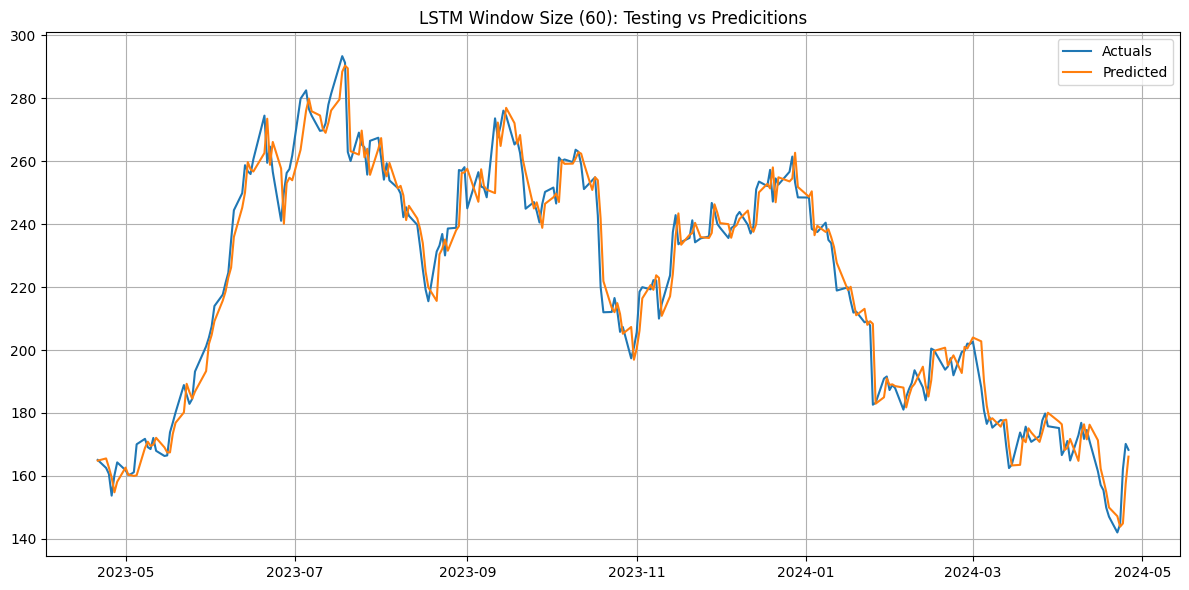

In [89]:
plt.figure(figsize=(12, 6))
#plt.plot(X_['Close'], label = 'Train')
plt.plot(test_results['Actuals'], label = 'Actuals')
plt.plot(test_results['Predicted'], label = 'Predicted')

plt.title('LSTM Window Size (60): Testing vs Predicitions')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [27]:
# X_future = pd.DataFrame({'Close-7':close_df['Close-6'][-1:], 'Close-6':close_df['Close-5'][-1:],'Close-5':close_df['Close-4'][-1:],'Close-4':close_df['Close-3'][-1:], 
#                    'Close-3':close_df['Close-2'][-1:], 'Close-2':close_df['Close-1'][-1:], 'Close-1':close_df['Close'][-1:]})

In [28]:
#X_future

In [94]:
X_future = pd.DataFrame()
column_name = 'Close'
#close_df.drop(columns = 'Date', inplace = True)
for i in close_df.iloc[-1:].values:
    inverse_i = i[::-1][:-1]
    for j in range(59, -1, -1):
        new_column_name = f"{column_name}-{j+1}"
        X_future[new_column_name] = [inverse_i[j]]


In [95]:
X_future

,Close-60,Close-59,Close-58,Close-57,Close-56,Close-55,Close-54,Close-53,Close-52,Close-51,...,Close-10,Close-9,Close-8,Close-7,Close-6,Close-5,Close-4,Close-3,Close-2,Close-1
0,188.860001,187.910004,181.059998,185.100006,187.580002,189.559998,193.570007,188.130005,184.020004,188.710007,...,161.479996,157.110001,155.449997,149.929993,147.050003,142.050003,144.679993,162.130005,170.179993,168.289993


In [96]:
X_future_scaled = scaler_X.transform(X_future)

In [97]:
X_future_scaled

array([[0.44450121, 0.44211451, 0.42490511, 0.4350549 , 0.44128544,
        0.44625982, 0.45633424, 0.44266722, 0.43234159, 0.44412437,
        0.47361897, 0.47236281, 0.45681155, 0.45934902, 0.46598154,
        0.45231452, 0.47098103, 0.4718101 , 0.47761355, 0.47721161,
        0.47912095, 0.44269233, 0.42410119, 0.41354942, 0.41885041,
        0.41053465, 0.4166396 , 0.41606174, 0.39581246, 0.37827648,
        0.38096468, 0.40666569, 0.40043515, 0.41133861, 0.40420363,
        0.3992041 , 0.40372628, 0.41638835, 0.42181497, 0.41166518,
        0.41023318, 0.38865237, 0.39304893, 0.39990755, 0.38430603,
        0.40460557, 0.41440364, 0.40154054, 0.40867555, 0.39975682,
        0.37571391, 0.36473509, 0.36056463, 0.34669662, 0.33946117,
        0.32689957, 0.33350694, 0.37734694, 0.39757107, 0.39282279]])

In [98]:
pred_future = model_load.predict(X_future_scaled)

1/1 [==============================] - 1s 858ms/step


In [99]:
pred_future_unscaled = scaler_y.inverse_transform(pred_future)

In [100]:
pred_future_unscaled

array([[167.15666]], dtype=float32)